# Project 1. Анализ оттока клиентов банка (the dataset from Kaggle.com)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Исследуем массив данных об оттоке клиентов некоторого банка. 
churn_data = pd.read_csv('data/churn.csv', sep=',') 

# Копируем таблицу, чтобы не испортить оригинальный массив данных
churn_df = churn_data.copy()

# RowNumber — номер строки таблицы (это лишняя информация, поэтому можем сразу от неё избавиться)
churn_df.drop(['RowNumber'], axis=1, inplace=True) 

#Создадим графу 'client status' для наглядного отображения статуса пользования банком
churn_df['client status'] = churn_df['Exited'].astype('category').cat.rename_categories({0:'Клиент', 1:'Покинул банк'})

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,client status
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Покинул банк
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Клиент
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Покинул банк
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Клиент
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Клиент


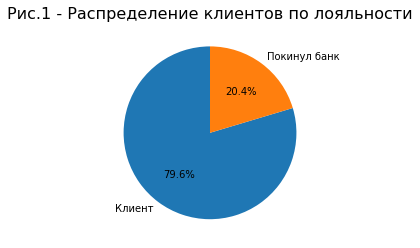

In [23]:
# Задание 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

fig = plt.figure(figsize=(6, 3))
ax = fig.add_axes((0, 0, 1, 1))

#данные
df = churn_df['client status'].value_counts().sort_values(ascending=False) 
#наименование категорий
labels = 'Клиент', 'Покинул банк'

#строим круговую диаграмму с помощью библиотеки matplotlib
pie = ax.pie(
    df,
    labels=labels, 
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Рис.1 - Распределение клиентов по лояльности', fontsize=16)
plt.show()

На рис.1 изображена круговая диаграмма распределения клиентов в зависимости от лояльности. В базе данных имеется: 10000 клиентов. Пользуются услугами банка 79,6 % или 7963 чел. Обозначенная оранжевым часть клиентов в 20,4 % или 2037 чел. покинула банк. 

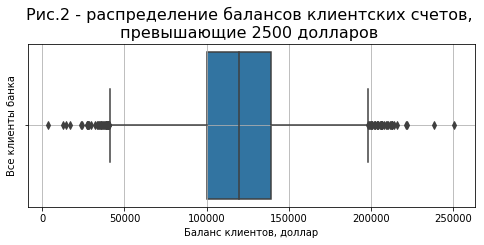

In [172]:
# 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
import seaborn as sns
fig = plt.figure(figsize=(8, 3))

#блочная диаграмма с помощью библиотеки Seaborn
boxplot = sns.boxplot(
    data=churn_df[churn_df['Balance'] > 2500], #клиенты с балансом более 2500 долларов
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Рис.2 - распределение балансов клиентских счетов, \nпревышающие 2500 долларов ', fontsize=16)
boxplot.set_xlabel('Баланс клиентов, доллар')
boxplot.set_ylabel('Все клиенты банка')
boxplot.grid();

#справочная информация (для отображения нужно стереть #)
#print('статистические показатели счета клиентов, имеющих баланс более 2500 долларов', churn_df[churn_df['Balance'] > 2500]['Balance'].describe())

# print('Межквартильный размах (IQR) балансов, на счету которых более 2500 долларов: ', churn_df[churn_df['Balance'] > 2500]['Balance'].quantile(0.75)-churn_df[churn_df['Balance'] > 2500]['Balance'].quantile(0.25))

#print('Количество клиентов с балансом от 100000 до 140000 долларов на счёте: ', churn_df[(churn_df['Balance'] > 100000) & (churn_df['Balance'] < 140000)]['Balance'].count())

На рис.2 изображено распределение балансов клиентских счетов, превосходящие 2500 долларов.
* В базе содержится 6383 клиента с таким остатоком на счету. Примерно половина из них (3250 клиента) имеют от 100 тыс. до 140 тыс. долларов на счету.
* Распределение баланса клиентского счета симметрично относительно среднего значения около 119827 долларов со стандартным отклонением около 30095 долларов. Медианный остаток составляет около 119840 долларов. 
* Половина клиентов имеет на счету средства, величина которых находится в относительно узком диапазоне.Межквартильный размах (IQR) составляет 39330 доллара. Границы распределения (диапазона) определим по формуле: нижняя граница Q25 - 1,5*IQR = 100182 - 1.5*39330 = 41187 долларов; верхняя граница Q75 + 1.5*IQR = 139512 + 1.5*39330 = 198507 долларов. 
* Минимальный остаток на счету составляет 3769 долларов, а максимальный 250898 долларов.

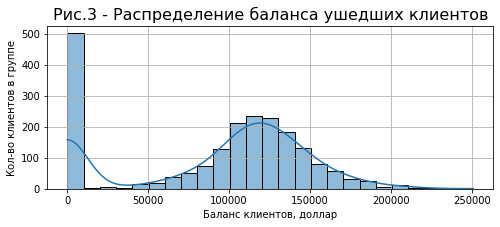

In [173]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig = plt.figure(figsize=(8, 3))

# гистограмма с помощью библиотеки Seaborn
hist = sns.histplot(
    data=churn_df[churn_df['Exited'] == 1],
    x='Balance',
    bins=25,
    kde=True, 
); 
hist.set_title('Рис.3 - Распределение баланса ушедших клиентов', fontsize=16)
hist.set_xlabel('Баланс клиентов, доллар')
hist.set_ylabel('Кол-во клиентов в группе')
hist.grid();

#справочная информация (для отображения нужно стереть #)
#print('статистические показатели счета покинувших банк клиентов: ', churn_df[churn_df['Exited'] == 1]['Balance'].describe())

#print('бедные клиенты', churn_df[(churn_df['Exited'] == 1) & (churn_df['Balance'] < 10000)]['Balance'].describe())

#print('состоятельные клиенты', churn_df[(churn_df['Exited'] == 1) & (churn_df['Balance'] > 10000)]['Balance'].describe())

На рис.3 изображена блочная диаграмма распределения остатков на счетах клиентов в разрезе признака оттока. Анализируя диаграммы, можно сделать следующие выводы:
* у 2037 покинувших банк клиентов на счету было от нуля до почти 250898 долларов. Из них половина или 1019 клиентов, имела на счету в среднем от примерно 38340 долларов до примерно 131433 доллара. Cредний остаток их счета составлял около 91109 долларов со стандартным оклонением в 58361 доллар. 
* Распределение их счетов имеет положительную ассиметрию, поскольку медианный баланс в 109389 долларов превосходит средний средний в 91109 долларов. Такая ассиметрия свидетельствует о том, что покинувших банк клинтов можно условно объединить в 2 группы в зависимости от их баланса: "бедные" - менее 10000 долларов, и "состоятельные" - от 100 до 150 тысяч долларов. В группах 501 и 1536 человек соответственно.  
* Группу "бедных" клиентов могло, например, не устроить отсутствие отсутствие какой-либо ипотечной программы банка, а "богатых" клиентов могло не устроить неудобство использования кредитной картой. 

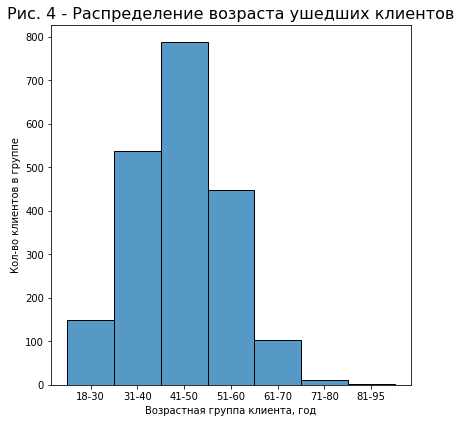

In [174]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

# Распределим всех клиентов банка на возрастные группы: 18-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-95.
def get_age_group(year):
    if 18 <= year <= 30:  # если год рождения лежит в диапазоне 18..30 лет, то клиент в группе 18-30
        return '18-30'
    elif 30 < year <= 40: # если год рождения лежит в диапазоне 31..40 лет, то клиент в группе 31-40
        return '31-40'
    elif 40 < year <= 50: # если год рождения лежит в диапазоне 41..50 лет, то клиент в группе 41-50
        return '41-50'
    elif 50 < year <= 60: # если год рождения лежит в диапазоне 51..60 лет, то клиент в группе 51-60
        return '51-60'
    elif 60 < year <= 70: # если год рождения лежит в диапазоне 61..70 лет, то клиент в группе 61-70
        return '61-70'
    elif 70 < year <= 80: # если год рождения лежит в диапазоне 71..80 лет, то клиент в группе 71-80
        return '71-80'
    elif 80 < year <= 95: # если год рождения лежит в диапазоне 81..95 лет, то клиент в группе 81-95
        return '81-95'
    else:
        return 'else'

# применим фйнкцию get_age_group к графе 'Age group'        
churn_df['Age group'] = churn_df['Age'].apply(get_age_group) # Отобразим результат в графе 'Age group'

#строим гитограмму с помощью библиотеки Seaborn
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes((0, 0, 1, 1))

sns.histplot(
    data=churn_df[churn_df['client status'] == 'Покинул банк'].sort_values(by='Age group'),
    x='Age group',
    kde=False
); 

axes.set_title('Рис. 4 - Распределение возраста ушедших клиентов', fontsize=16)
axes.set_xlabel('Возрастная группа клиента, год');
axes.set_ylabel('Кол-во клиентов в группе');

#справочная информация (для отображения нужно стереть #)
#print('Количество ушедших клиентов в возрастной группе 41-50: ', churn_df[(churn_df['client status'] == 'Покинул банк') & (churn_df['Age group']=='41-50')].value_counts().shape[0], 'человек') #788

#print('Количество ушедших клиентов в возрастной группе 31-60: ', churn_df[(churn_df['client status'] == 'Покинул банк') & (churn_df['Age'] > 31) & (churn_df['Age'] < 60)].value_counts().shape[0], 'человек') #1709

#print('Количество ушедших клиентов в возрастных группах 18-30 и 81-95: ', churn_df[(churn_df['client status'] == 'Покинул банк') & (churn_df['Age'] < 30) | (churn_df['Age'] > 80)].value_counts().shape[0], 'человек') #136

На рис.4 изображена столбчатая диаграмма распределения 2037 покинувших банк клиентов по возрастным группам. Анализируя диаграмму, можно сделать следующие выводы:
* наиболее многочисленная группа из 788 (40%) таких клиентов была в возрасте от 41 до 50 лет. Именно на эту возрастную группу банку следует обратить внимание;
* основная когорта ушедших клиентов из 1709 (83%) была в возрасте между 31 и 60 годами. 
* выбросы могут содержаться снаружи границ распределения - т.е. в группах 18-30 и 71-95 лет.

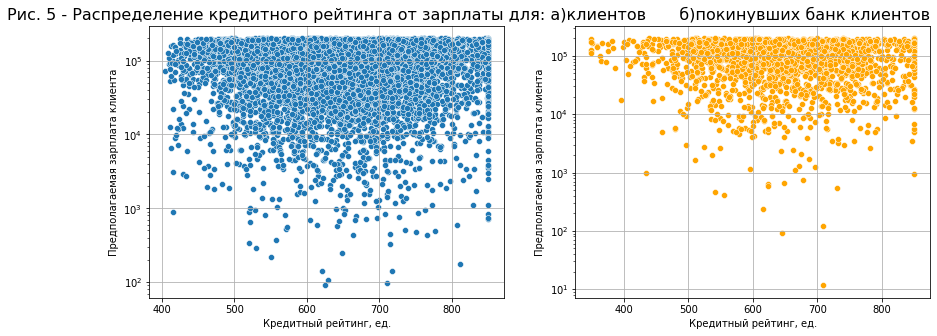

In [85]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# построим диаграммы рассеяния с помощью библиотеки Seaborn
sns.scatterplot(
    data=churn_df[churn_df['client status'] == 'Клиент'],
    x='CreditScore',
    y='EstimatedSalary', #marker="+",
    ax=axes[0]    
    ); 
# логарифмическая шкала по оси У
axes[0].set(yscale="log") #xscale="log"

axes[0].set_title('Рис. 5 - Распределение кредитного рейтинга от зарплаты для: а)клиентов', fontsize=16)
axes[0].set_xlabel('Кредитный рейтинг, ед.')
axes[0].set_ylabel('Предполагаемая зарплата клиента')
axes[0].grid();

#Диаграмма рассеяния 2 
sns.scatterplot(
    data=churn_df[churn_df['client status'] == 'Покинул банк'], #
    x='CreditScore',
    y='EstimatedSalary', 
    ax=axes[1],
    color='orange',
    ); 

# логарифмическая шкала по оси У
axes[1].set(yscale="log") #xscale="log"

axes[1].set_title('  б)покинувших банк клиентов', fontsize=16, loc='right')
axes[1].set_xlabel('Кредитный рейтинг, ед.')
axes[1].set_ylabel('Предполагаемая зарплата клиента')

axes[1].grid();

На рис.5 представлены диаграммы рассеяния кредитного рейтинга клиентов банка от предполагаемой зарплаты с учётом их статуса оттока: для текущих клиентов(слева) и для покинувших банк клиентов(справа). Поскольку на диаграмме без масштаба трудно определить взаимосвязь показателей, то воспользуемся логарифмической шкалой для визуализации параметра "предполагаемая зарплата клиента". Анализируя масштабные диаграммы можно сделать следующие выводы:
* распределение кредитного рейтинга практически не зависит от зарплаты клиента. Это означает, что большинство клиентов пользовались кредитной программой.
* предполагаемая средняя зарплата больнинства текущих и ушедших клиентов составляет около 100090 с отклонением в 57510 долларов.
* в верхней левой и верхней правой четвертях обеих дииаграмм можно выделить следующие группы клиентов:
1. "не пользующиеся кредитной программой банка" - покинувшие банк клиенты с низким кредитным рейтингом, но с высокой зарплатой;
2. "активные пользователи кредитной программы банка" - текущие клиенты с различной зарплатой и максимальным кредитным рейтингом.

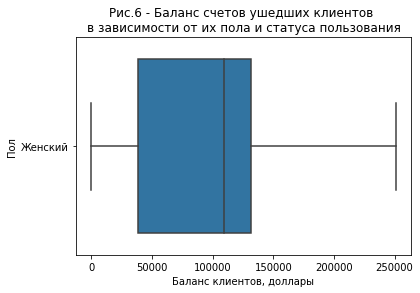

In [16]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

# В графе 'Gender' преобразуем значения пола клиента к следующему виду: 'Male'='Мужской', иначе = 'Женский'
churn_df['Gender'] = churn_df['Gender'].apply(lambda x: 'Мужской' if x == 'Male' else 'Женский')

# построим блочную диаграмму с помощью библиотеки Seaborn
fig = sns.boxplot(
    data = churn_df[churn_df['Статус_клиента'] == 'Покинул банк'],
    x = 'Balance',
    y = 'Gender',
)
fig.set_title('Рис.6 - Баланс счетов ушедших клиентов \nв зависимости от их пола и статуса пользования')
fig.set_xlabel('Баланс клиентов, доллары')
fig.set_ylabel("Пол");

На рис.6 представлена диаграмма распределения баланса клиентских счетов в зависимости от пола клиента и его статуса пользования банком. Анализируя диаграмму, можно сделать следующие выводы:
* все 2037 покинувших банк клиента - это женщины. 
* принимая во внимание рис.3,4 и 5 можно добавить, что ушедшие женщины были в возрасте 31-50 лет и имели высокую зарплату (61109+/- 58361 доллар).

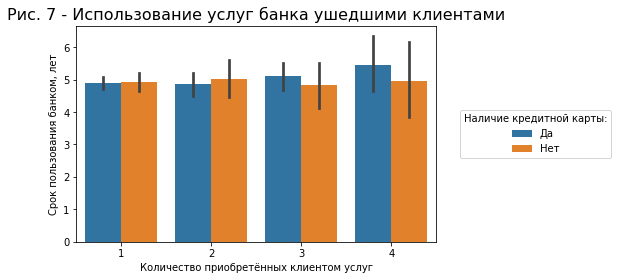

In [133]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

# создадим графу 'Наличие_кредитной_карты', значения которой будут выбраны соответственно значениям из графы 'HasCrCard': "да" - "1", "нет" - "0"
churn_df['Наличие_кредитной_карты'] = churn_df['HasCrCard'].apply(lambda x: 'Да' if x == 1 else 'Нет')

fig = plt.figure(figsize=(5, 3))
ax = fig.add_axes((0, 0, 1, 1))

# построим столбчатую диаграмму с помощью библиотеки Seaborn
hist = sns.barplot(
    data=churn_df[churn_df['client status'] == 'Покинул банк'],
    x = 'NumOfProducts',
    y = 'Tenure', 
    hue = "Наличие_кредитной_карты"  #color = 'IsActiveMember' , #kde=False
)

ax.set_title('Рис. 7 - Использование услуг банка ушедшими клиентами', fontsize=16)
ax.set_xlabel('Количество приобретённых клиентом услуг')
ax.set_ylabel('Срок пользования банком, лет');
ax.legend(title='Наличие кредитной карты:', loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1); 

На рис.7 изображена диаграмма использования услуг банка ушедшими клиентами в зависимости от продолжительности использования услуг банка и наличия кредитной карты. Анализируя диаграмму, можно сделать следующие выводы:
* ушедшие клиенты пользовались банком около 5 лет;
* вариации у признаков "использование кредитной картой" и "количество приобретенных услуг" встречаются одинаково часто, что горвоит о том, что данные признаки не имели существенного влияния на желание покинуть банк.

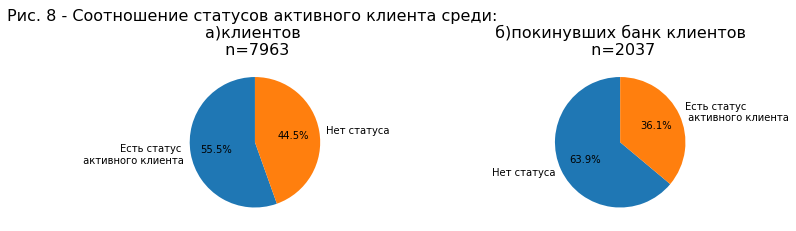

In [122]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3)) 
labels = 'Есть статус \n активного клиента', 'Нет статуса'
labels1 =  'Нет статуса', 'Есть статус \n активного клиента'

# круговая даиграмма 1 с помощью библиотеки matplotlib
ax1.pie(
    churn_df[churn_df['client status'] == 'Клиент']['IsActiveMember'].value_counts().sort_values(ascending=False),
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
)

ax1.set_title('Рис. 8 - Cоотношение статусов активного клиента среди: \nа)клиентов \n n=7963', fontsize=16)

# круговая даиграмма 2 с помощью библиотеки matplotlib
ax2.pie(
    churn_df[churn_df['client status'] == 'Покинул банк']['IsActiveMember'].value_counts().sort_values(ascending=False),
    labels=labels1,
    autopct='%1.1f%%',
    startangle=90,
)

ax2.set_title('  \n б)покинувших банк клиентов \n n=2037', loc='center', fontsize=16);

На рис.8 изображены диаграммы, показывающие клиентов с ушедшими клиетами по статусу активного клиента. Анализируя диаграммы, можно сделать следующий вывод:
* среди клиентов банка больше тех, которые имеют статус.
* средипокинувших банк клиентов больше "пассивных" - тех, которые не имели статуса. В связи с этим, можно порекоммендовать банку активнее выявлять потребности "пассивных" клиентрв и предлагать им соответствующие услуги.

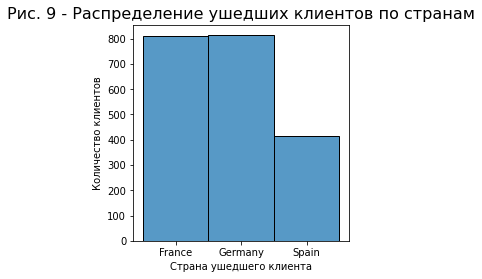

In [82]:
#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
fig= plt.figure(figsize=(3, 3))
ax = fig.add_axes((0, 0, 1, 1))

#данные
df=churn_df[churn_df['client status'] == 'Покинул банк'].sort_values(by='Geography', ascending=True)

# построим гистограмму с помощью библиотеки Seaborn
hist = sns.histplot(
    data=df,
    x = 'Geography'
)

ax.set_title('Рис. 9 - Распределение ушедших клиентов по странам', fontsize=16)
ax.set_xlabel('Страна ушедшего клиента')
ax.set_ylabel('Количество клиентов');

На рис.9 изображена диаграмма распределения ушедших клиентов по странам. Анализируя диаграмму отметим, что больше всего клиентов, 814 чел или 40%, покинуло немецкий филиал банка. Сопоставимое количство, 810 чел. или 39,7% , покинуло французский филиал. Меньше всего, 413 чел. или 20,3%, покинуло испанский филиал банка.
Принимая во внимание предыдущие диаграммы отметим, что женщинам среднего возраста с высокой зарплатой из Германии и Франции могло не понравитья особенности начисления кредитного рейтинга. Возможно, что из-за этого они начали активно пользоваться кредитной программой и не получили статус "активного клиента".

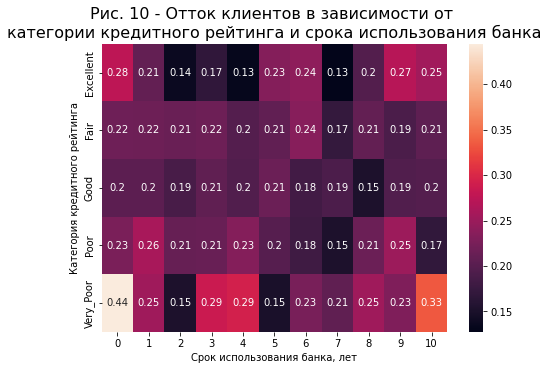

In [127]:
#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#функция распределения кредитного рейтинга на 5 групп по его значению
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# Отобразим результат в графе 'CreditScoreCat'
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat) 

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes((0, 0, 1, 1))

#данные
df = churn_df.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

# строим тепловую диаграму с помощью библиотеки Seaborn. Параметр 'annot=True' показывает значения на диаграмме
sns.heatmap(df, annot=True ); #linewidths=.05

ax.set_title('Рис. 10 - Отток клиентов в зависимости от \nкатегории кредитного рейтинга и срока использования банка', fontsize=16)
ax.set_xlabel('Срок использования банка, лет')
ax.set_ylabel('Категория кредитного рейтинга');

На рис.10 изображена диаграмма оттока клиентов в зависимости от категории кредитного рейтинга и срока использования банка. Анализируя диаграмму, можно сделать следующие выводы:
* у клиеентов с очень низким кредитным рейтингом('very_poor') наблюдается максимальный отток (в порядке убывания интенсивности) втечение : 1, 11, 4 и 5 года пользования банком. Возможно, уход клиентов обусловлен следующими мотивами: разочарование от низкой величиной кредитного рейтинга у вновь пришедших клиентов, которое ежегодно уменьшается в половину по мере использования кредитной программы. На 4 и 5 году это неприятие вновь увеличивается и разочарованные клиенты уходят. С 6-го года клиенты привыкают к условиям программы, но недовольство ею остаётся вплоть до 11-го года пользования банком.
* у клиентов с рейтингами 'poor', 'good', 'fair' не наблюдается значительных колебаний оттока
* у клиентов с рейтингом группы 'excellent' наблюдается схожая картина оттока по сравнению с группой 'very_poor', но интенсивность её меньше. Максимумы оттока наблюдаются на 1 и 10 и 11 годах. Также всплеск отток наблюдается в середине периода использования банка на 6 и 7 году - т.е. со смещением в 1 год позже  (по сравнению с группой 'very_poor'.